In [85]:
'''
CS6140 Assignment 4
Question 3. PCA
Jul 14 2022
Wing Man, Kwok
'''

'\nCS6140 Assignment 4\nQuestion 3. PCA\nJul 14 2022\nWing Man, Kwok\n'

In [86]:
#!pip3 install plot-metric

In [87]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import linalg as l_algebra                   #Q2.3 linalg is linear algebra, to compute eigen pairs
from sklearn.linear_model import LogisticRegression     #Q2.4 import logistic regressor
from sklearn.metrics import confusion_matrix            #Q2.4 to compare PCA performance
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from plot_metric.functions import BinaryClassification  #Q2.4 Plot ROC curve
import matplotlib.pyplot as plt

In [88]:
#EDA
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS6140 Assignment4/dataset.csv")
df.head(10)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
8,2,1,0.80826,0.61766,0.50447,318,317,0.006057,0.000069,0.00161,...,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1


In [89]:
#Q2.1 Standardize dataset
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_standardized = StandardScaler().fit_transform(X)
print("Standardized dataset:")
print(X_standardized)

Standardized dataset:
[[-1.72519117  0.96874225  0.62764391 ... -0.775137   -0.81472704
  -0.36659507]
 [-1.72519117  0.96874225  0.12161952 ... -0.52664699 -0.58297219
   0.40039616]
 [-1.72519117  0.96874225  0.61795018 ... -0.75606253 -0.8043897
  -0.7809355 ]
 ...
 [ 1.72519117 -1.03226633  0.81336154 ... -0.71674252 -0.79017671
  -0.77287314]
 [ 1.72519117 -1.03226633  0.54105055 ... -0.77132466 -0.82631929
  -0.81173208]
 [ 1.72519117 -1.03226633  0.3945807  ... -0.68658105 -0.84098293
  -0.82811405]]


In [90]:
#Q2.  Split dataset and apply eigen decomposition
X_train, X_test, y_train, y_test = train_test_split(X_standardized , y, test_size=0.2, random_state=42)   # 80% training and 20% testing

X_train_mean = np.mean(X_train, axis=0)
covariance__matrix = (X_train - X_train_mean).T.dot((X_train - X_train_mean)) / (X_train.shape[0] - 1)

eigenvalues, eigenvectors = l_algebra.eig(covariance__matrix)

print("Eigenvalues: \n", eigenvalues, "\n")
print("Eigvenvectors: \n", eigenvectors, "\n")
print("Number of Eigenvalues: ", len(eigenvalues))

Eigenvalues: 
 [ 9.40042100e+01+0.00000000e+00j  6.96541114e+01+0.00000000e+00j
  6.73372070e+01+0.00000000e+00j  3.54692046e+01+0.00000000e+00j
  2.87867209e+01+0.00000000e+00j  2.46242733e+01+0.00000000e+00j
  2.03382574e+01+0.00000000e+00j  1.74104013e+01+0.00000000e+00j
  1.67280338e+01+0.00000000e+00j  1.49394805e+01+0.00000000e+00j
  1.34806711e+01+0.00000000e+00j  1.14182128e+01+0.00000000e+00j
  1.05738173e+01+0.00000000e+00j  1.04616923e+01+0.00000000e+00j
  9.86856834e+00+0.00000000e+00j  9.37624107e+00+0.00000000e+00j
  8.46604329e+00+0.00000000e+00j  8.26270533e+00+0.00000000e+00j
  7.61107708e+00+0.00000000e+00j  7.11180576e+00+0.00000000e+00j
  6.56179862e+00+0.00000000e+00j  6.26608641e+00+0.00000000e+00j
  6.10427644e+00+0.00000000e+00j  5.67823293e+00+0.00000000e+00j
  5.36679825e+00+0.00000000e+00j  5.20529649e+00+0.00000000e+00j
  5.07389262e+00+0.00000000e+00j  4.86952915e+00+0.00000000e+00j
  4.55038074e+00+0.00000000e+00j  4.34742250e+00+0.00000000e+00j
  4.177939

In [91]:
#Q2.3 Select first 6 principal components with largest eigenvalues
explained_variance = [eigenvalue / np.sum(eigenvalues) for eigenvalue in sorted(eigenvalues, reverse = True)]
                       
print("First 6 principal components with explained_variance \n", explained_variance[:6])

First 6 principal components with explained_variance 
 [(0.12235302406236238-4.318423713279603e-35j), (0.09065967547448368-3.1998137799004916e-35j), (0.08764406298890871-3.0933783847186653e-35j), (0.04616563919087895-1.6294063227974502e-35j), (0.037467921478672214-1.3224222436735757e-35j), (0.03205020612088547-1.131205143384002e-35j)]


In [92]:
#Q2.4. Project training set into the new 6 dimensional feature space

principal_components = [(np.abs(eigenvalues[i].real), eigenvectors[:, i].real) for i in range(len(eigenvalues))]
principal_components.sort(key=lambda x: x[0], reverse=True)

projection_matrix = np.hstack((principal_components[0][1].reshape(754,1), 
                               principal_components[1][1].reshape(754,1),
                               principal_components[2][1].reshape(754,1),
                               principal_components[3][1].reshape(754,1),
                               principal_components[4][1].reshape(754,1),
                               principal_components[5][1].reshape(754,1),))

print(projection_matrix.shape)
print(projection_matrix, "\n")

projected_X = X_train.dot(projection_matrix)      #project all data points by projection matrix

print(projected_X.shape)

(754, 6)
[[-1.83933909e-03 -7.05655847e-03 -1.80313621e-03 -7.84544836e-03
  -2.96227445e-02  2.12271437e-02]
 [ 3.89232240e-02 -2.05043363e-02  5.71709779e-02  1.21003719e-02
   2.30674723e-02  1.97259224e-02]
 [-2.67587966e-02  3.45854992e-02  2.94617702e-02  1.80515323e-02
   5.06258396e-03  2.40246281e-02]
 ...
 [ 1.26392694e-02  2.51354321e-02  7.86682509e-03  9.84811932e-03
   3.74196635e-02 -6.99885646e-03]
 [ 2.02590261e-02  3.08596801e-02  3.01508091e-03  1.69448376e-02
   2.42053584e-02 -3.99543521e-03]
 [ 3.12861669e-02  4.68772791e-02 -4.92062961e-03  2.42996840e-02
   1.46348359e-02  2.38216150e-05]] 

(604, 6)


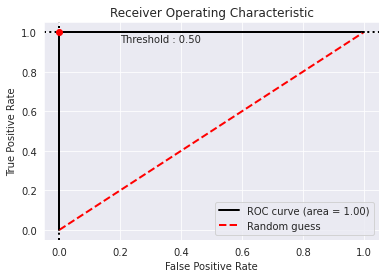

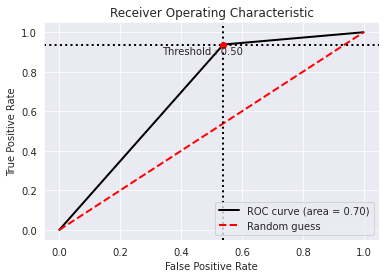

In [94]:
#Q2.5 Train two logistic regression models and report ROC curves

classifier_logistic = LogisticRegression(random_state = 42, max_iter=200)
classifier_logistic.fit(X_train, y_train)

classifier_my_pca = LogisticRegression(random_state=42, max_iter=200)
classifier_my_pca.fit(projected_X, y_train)

y_pred = classifier_logistic.predict(X_train) 
y_pred2 = classifier_my_pca.predict(projected_X) 

#skplt.metrics.plot_roc_curve(y_train, y_pred)
bc = BinaryClassification(y_train, y_pred, labels=["Class 1", "Class 2"])
bc.plot_roc_curve()
plt.show()

bc = BinaryClassification(y_train, y_pred2, labels=["Class 1", "Class 2"])
bc.plot_roc_curve()
plt.show()

In [ ]:
Q2.6
print('Accuracy Score:', accuracy_score(y_train, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_train, y_pred))
print('Classification \n', classification_report(y_train, y_pred), "\n")

print('Accuracy Score:', accuracy_score(y_train, y_pred2))
print('Confusion matrix \n',  confusion_matrix(y_train, y_pred2))
print('Classification \n', classification_report(y_train, y_pred2))
